In [15]:
import numpy as np
from steam_review_scraper import get_game_review 
import timeit

start_time = timeit.default_timer()

reviews_df = get_game_review(1680880, language='english')
print(reviews_df.shape)

r_df = reviews_df[reviews_df['recommend'] == "Recommended"]
print(r_df.shape)

nr_df = reviews_df[reviews_df['recommend'] != "Recommended"]
print(nr_df.shape)

Rows , Columns = reviews_df.shape
print("Total English reviews: ", Rows)
print("Columns:",list(reviews_df.keys()))

print(reviews_df.describe())

elapsed_time = timeit.default_timer() - start_time
print(f"Total Elapsed time: {elapsed_time:.2f} seconds")



(3270, 8)
(2021, 8)
(1249, 8)
Total English reviews:  3270
Columns: ['user', 'playtime', 'user_url', 'post_date', 'helpfulness', 'review', 'recommend', 'early_access_review']
          playtime  helpfulness
count  3270.000000  3270.000000
mean     25.311254    24.748012
std      37.457086   207.706131
min       0.100000     0.000000
25%       5.225000     1.000000
50%      18.000000     3.000000
75%      35.050000     7.000000
max    1460.700000  7336.000000
Total Elapsed time: 92.24 seconds


In [17]:
reviews_df.head()

,user,playtime,user_url,post_date,helpfulness,review,recommend,early_access_review
0,NoQuincydence,17.0,https://steamcommunity.com/profiles/7656119806...,"January 25, 2023",3493,Okay. I'm almost done with the game and I feel...,Not Recommended,None
1,ffplayer6996,16.8,https://steamcommunity.com/profiles/7656119840...,"February 16, 2023",1578,Because of this game I will never pre-order a ...,Not Recommended,None
2,「 Boss 」,15.1,https://steamcommunity.com/id/eddjr6tk/,"January 29, 2023",1377,As of writing I have put 14 hours into this ga...,Not Recommended,None
3,Starforce,16.4,https://steamcommunity.com/profiles/7656119906...,"January 26, 2023",1799,I tried REALLY hard to like this game. I reall...,Not Recommended,None
4,Halundaar,14.3,https://steamcommunity.com/profiles/7656119832...,"February 19, 2023",1099,"Cringe dialogue, unlikable protagonist, empty ...",Not Recommended,None


In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [5]:
! python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 54.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Extract reviews
reviews = reviews_df["review"].tolist()

# Define a function to extract the most relevant phrases from a review
def extract_relevant_phrases(doc, n=7):
    phrases = []
    for chunk in doc.noun_chunks:
        phrases.append(chunk.text)
    return phrases[:n]

# Define a function to analyze the sentiment of a review
def sentiment_analysis(doc):
    return doc.sentiment

# Define a function to categorize the sentiment as good or bad
def sentiment_category(sentiment_score):
    if sentiment_score > 0:
        return "good"
    else:
        return "bad"

# Preprocess the reviews
reviews_nlp = [nlp(review) for review in reviews]

# Extract relevant phrases and analyze sentiment
relevant_phrases = [extract_relevant_phrases(doc) for doc in reviews_nlp]
sentiments = [sentiment_analysis(doc) for doc in reviews_nlp]
sentiment_categories = [sentiment_category(sentiment) for sentiment in sentiments]

# Find top 14 relevant topics
keywords = ["gameplay", "bugs", "graphics"]
vectorizer = TfidfVectorizer(stop_words="english", vocabulary=keywords)
X = vectorizer.fit_transform(reviews)

kmeans = KMeans(n_clusters=14)
kmeans.fit(X)

topics = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

try:
    # Print the top 14 topics
    for i, topic in enumerate(topics):
        print(f"Topic {i + 1}:")
        for j in topic:
            print(f"  - {terms[j]} ({sentiment_categories[j]})")
except:
    pass

# Visualize the topics using NetworkX and Matplotlib
G = nx.Graph()

# Add nodes and edges to the graph
for i, topic in enumerate(topics):
    for j in topic:
        G.add_node(terms[j], sentiment=sentiment_categories[j])
        G.add_edge(keywords[i], terms[j], sentiment=sentiment_categories[j])

# Set the colors for the nodes and edges
node_colors = ["green" if n[1]["sentiment"] == "good" else "red" for n in G.nodes(data=True)]
edge_colors = ["green" if e[2]["sentiment"] == "good" else "red" for e in G.edges(data=True)]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, with_labels=True, font_size=12, font_weight="bold", node_size=3000)
plt.show()


Topic 1:
  - graphics (bad)
  - bugs (bad)
  - gameplay (bad)
Topic 2:
  - gameplay (bad)
  - graphics (bad)
  - bugs (bad)
Topic 3:
  - graphics (bad)
  - gameplay (bad)
  - bugs (bad)
Topic 4:
  - bugs (bad)
  - graphics (bad)
  - gameplay (bad)
Topic 5:
  - graphics (bad)
  - gameplay (bad)
  - bugs (bad)
Topic 6:
  - bugs (bad)
  - gameplay (bad)
  - graphics (bad)
Topic 7:
  - gameplay (bad)
  - graphics (bad)
  - bugs (bad)
Topic 8:
  - bugs (bad)
  - graphics (bad)
  - gameplay (bad)
Topic 9:
  - graphics (bad)
  - gameplay (bad)
  - bugs (bad)
Topic 10:
  - gameplay (bad)
  - bugs (bad)
  - graphics (bad)
Topic 11:
  - bugs (bad)
  - graphics (bad)
  - gameplay (bad)
Topic 12:
  - gameplay (bad)
  - bugs (bad)
  - graphics (bad)
Topic 13:
  - bugs (bad)
  - gameplay (bad)
  - graphics (bad)
Topic 14:
  - graphics (bad)
  - bugs (bad)
  - gameplay (bad)


IndexError: list index out of range

In [18]:
backup_df = reviews_df
print(reviews_df.shape)
print(backup_df.shape)

(3270, 8)
(3270, 8)


In [69]:
print(reviews_df.shape)
print(backup_df.shape)
reviews_df.keys()


(2913, 9)
(3270, 9)


Index(['user', 'playtime', 'user_url', 'post_date', 'helpfulness', 'review',
       'recommend', 'early_access_review', 'processed_review'],
      dtype='object')

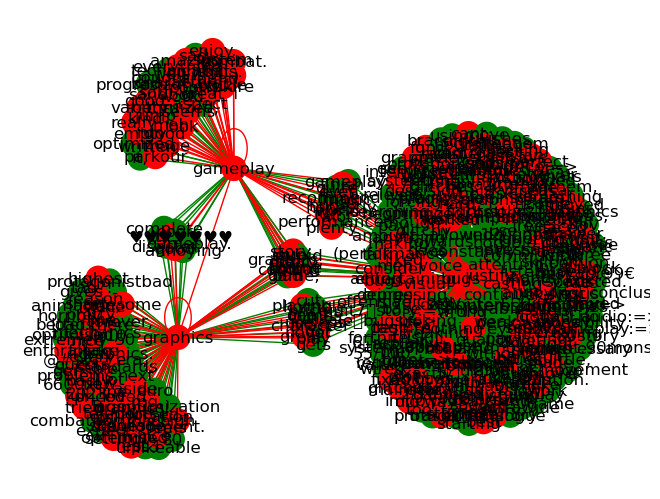

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from textblob import TextBlob

# Load the data
# reviews_df

# # Add your list of keyword topics
# keywords = ['gameplay', 'bugs', 'graphics']

# # Preprocessing the reviews
# def preprocess_review(review):
#     return ' '.join([word.lower() for word in review.split() if word.lower() not in STOPWORDS])

# reviews_df['processed_review'] = reviews_df['review'].apply(preprocess_review)

# Creating a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews_df['processed_review'])

# Function to get the top relevant words
def get_top_relevant_words(keyword, n=7, sentiment='good'):
    keyword_tfidf = vectorizer.transform([keyword])
    cosine_sim_matrix = cosine_similarity(keyword_tfidf, tfidf_matrix)
    sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews_df['processed_review']]
    
    if sentiment == 'good':
        sorted_indices = np.argsort(cosine_sim_matrix * sentiment_scores)[::-1]
    else:
        sorted_indices = np.argsort(cosine_sim_matrix * -np.array(sentiment_scores))

    top_n_reviews = [reviews_df.iloc[i]['processed_review'] for i in sorted_indices.flatten()[:n]]
    top_n_words = [word for review in top_n_reviews for word in review.split()]

    return top_n_words

# Create the graph
G = nx.Graph()

# Add the keyword nodes
for keyword in keywords:
    G.add_node(keyword, color='blue')

# Add the top relevant words nodes and edges
for keyword in keywords:
    for sentiment in ['good', 'bad']:
        top_words = get_top_relevant_words(keyword, sentiment=sentiment)
        for word in top_words:
            G.add_node(word, color='green' if sentiment == 'good' else 'red')
            G.add_edge(keyword, word, color='green' if sentiment == 'good' else 'red')

# Draw the graph
pos = nx.spring_layout(G, seed=42)
colors = [node[1]['color'] for node in G.nodes(data=True)]
edge_colors = [edge[2]['color'] for edge in G.edges(data=True)]
nx.draw(G, pos, node_color=colors, edge_color=edge_colors, with_labels=True)
plt.show()


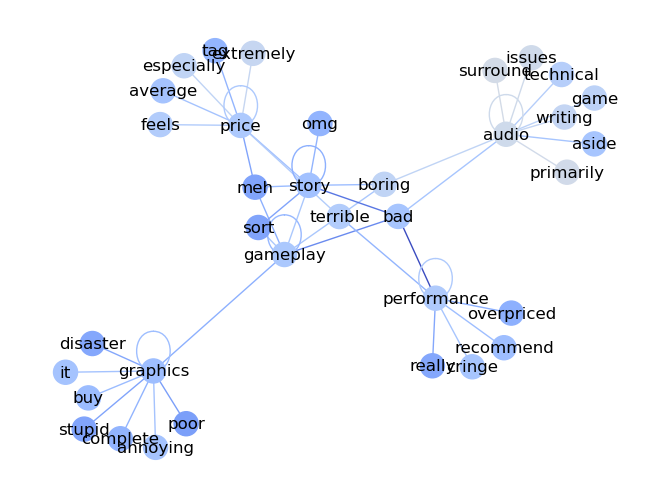

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from textblob import TextBlob
import re

# Load the data
# reviews_df = pd.read_csv('path/to/your/csv/file.csv')
# For example purposes, we'll use a dummy dataframe
# data = {'user': [1, 2, 3],
#         'review': ['Great gameplay, but some bugs', 'Amazing graphics, poor gameplay', 'Too many bugs, but good graphics']}
# reviews_df = pd.DataFrame(data)

# Add your list of keyword topics
keywords = ['gameplay', 'performance', 'graphics','story','audio','price']

# Preprocessing the reviews
# def preprocess_review(review):
#     return ' '.join([word.lower() for word in review.split() if word.lower() not in STOPWORDS])

# reviews_df['processed_review'] = reviews_df['review'].apply(preprocess_review)
pattern = r'[^a-zA-Z0-9\s]+'
reviews_df['processed_review'] = reviews_df['processed_review'].apply(lambda x: re.sub(pattern, '', x))

# Creating a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews_df['processed_review'])

# Function to get the top relevant words
def get_top_relevant_words(keyword, n=10):
    keyword_tfidf = vectorizer.transform([keyword])
    cosine_sim_matrix = cosine_similarity(keyword_tfidf, tfidf_matrix)
    sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews_df['processed_review']]
    
    sorted_indices = np.argsort(cosine_sim_matrix * sentiment_scores)[::-1]
    top_n_reviews = [reviews_df.iloc[i]['processed_review'] for i in sorted_indices.flatten()[:n]]
    top_n_words = [word for review in top_n_reviews for word in review.split()]
    top_n_sentiments = [sentiment_scores[i] for i in sorted_indices.flatten()[:n]]

    return list(zip(top_n_words, top_n_sentiments))

# Create the graph
G = nx.Graph()

# Add the keyword nodes
for keyword in keywords:
    G.add_node(keyword, color='blue')

# Add the top relevant words nodes and edges
for keyword in keywords:
    top_words_sentiments = get_top_relevant_words(keyword)
    for word, sentiment in top_words_sentiments:
#         color = plt.cm.RdYlGn((sentiment + 1) / 2)  # Convert sentiment score to color
        color = plt.cm.coolwarm((sentiment + 1) / 2)  # Convert sentiment score to color
        G.add_node(word, color=color)
        G.add_edge(keyword, word, color=color)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
colors = [node[1]['color'] for node in G.nodes(data=True)]
edge_colors = [edge[2]['color'] for edge in G.edges(data=True)]
nx.draw(G, pos, node_color=colors, edge_color=edge_colors, with_labels=True)
plt.show()




In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from textblob import TextBlob

# Load the data
# reviews_df = pd.read_csv('path/to/your/csv/file.csv')
# For example purposes, we'll use a dummy dataframe
# data = {'user': [1, 2, 3],
#         'review': ['Great gameplay, but some bugs', 'Amazing graphics, poor gameplay', 'Too many bugs, but good graphics']}
# reviews_df = pd.DataFrame(data)

# Add your list of keyword topics
keywords = ['gameplay', 'performance', 'graphics','story','audio','price']

# Preprocessing the reviews
# def preprocess_review(review):
#     return ' '.join([word.lower() for word in review.split() if word.lower() not in STOPWORDS])

# reviews_df['processed_review'] = reviews_df['review'].apply(preprocess_review)

# Creating a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews_df['processed_review'])

# Function to get the top relevant words
def get_top_relevant_words(keyword, n=10):
    keyword_tfidf = vectorizer.transform([keyword])
    cosine_sim_matrix = cosine_similarity(keyword_tfidf, tfidf_matrix)
    sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews_df['processed_review']]
    
    sorted_indices = np.argsort(cosine_sim_matrix * sentiment_scores)[::-1]
    top_n_reviews = [reviews_df.iloc[i]['processed_review'] for i in sorted_indices.flatten()[:n]]
    top_n_words = [word for review in top_n_reviews for word in review.split()]
    top_n_sentiments = [sentiment_scores[i] for i in sorted_indices.flatten()[:n]]

    return list(zip(top_n_words, top_n_sentiments))

# Create the graph
G = nx.Graph()

# Add the keyword nodes
for keyword in keywords:
    G.add_node(keyword, color='blue', node_type='keyword')

# Add the top relevant words nodes and edges
for keyword in keywords:
    top_words_sentiments = get_top_relevant_words(keyword)
    for word, sentiment in top_words_sentiments:
        color = plt.cm.coolwarm((sentiment + 1) / 2)  # Convert sentiment score to color
        G.add_node(word, color=color, node_type='word')
        G.add_edge(keyword, word, color=color)

# Draw the graph
pos = nx.spring_layout(G, seed=42, k=0.3, iterations=100)

# Keyword and word nodes separation
keyword_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'keyword']
word_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'word']

# Colors
colors = [attr['color'] for _, attr in G.nodes(data=True)]
edge_colors = [attr['color'] for _, _, attr in G.edges(data=True)]
# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# Draw square nodes for keywords
for keyword_node in keyword_nodes:
    x, y = pos[keyword_node]
    square = plt.Rectangle((x-0.1, y-0.1), 0.2, 0.2, color='blue', zorder=2)
    plt.gca().add_patch(square)
    plt.text(x, y, s=keyword_node, bbox=dict(facecolor='blue', alpha=0.5),
             horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

# Draw circular nodes for words
nx.draw_networkx_nodes(G, pos, nodelist=word_nodes, node_color=colors, node_shape='o', node_size=800)
        
# Draw labels
word_labels = {node: {'label': node, 'font_weight': 'normal', 'font_size': 12, 'color': 'black'} for node in word_nodes}
nx.draw_networkx_labels(G, pos, labels={node: data['label'] for node, data in word_labels.items()},
                        font_size=12, font_weight='normal', font_color='black')

# Show plot
plt.axis('off')
plt.margins(0.2)
plt.show()


In [ ]:
import numpy as np
from steam_review_scraper import get_game_review 
import timeit

start_time = timeit.default_timer()

reviews_df = get_game_review(1307890, language='english')
print(reviews_df.shape)

r_df = reviews_df[reviews_df['recommend'] == "Recommended"]
print(r_df.shape)

nr_df = reviews_df[reviews_df['recommend'] != "Recommended"]
print(nr_df.shape)

Rows , Columns = reviews_df.shape
print("Total English reviews: ", Rows)
print("Columns:",list(reviews_df.keys()))

print(reviews_df.describe())

elapsed_time = timeit.default_timer() - start_time
print(f"Total Elapsed time: {elapsed_time:.2f} seconds")



Total Elapsed time: 66.38 seconds


ValueError: 'c' argument has 54 elements, which is inconsistent with 'x' and 'y' with size 52.

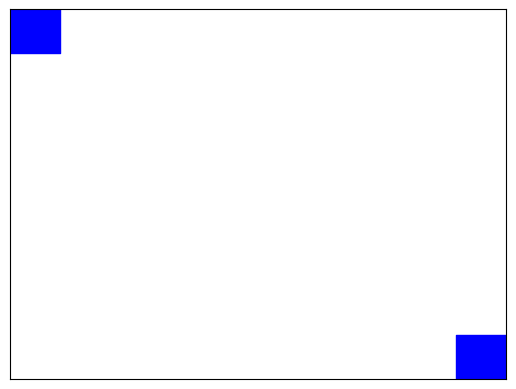

In [68]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from textblob import TextBlob

# Load the data
# reviews_df = pd.read_csv('path/to/your/csv/file.csv')
# For example purposes, we'll use a dummy dataframe
# data = {'user': [1, 2, 3],
#         'review': ['Great gameplay, but some bugs', 'Amazing graphics, poor gameplay', 'Too many bugs, but good graphics']}
# reviews_df = pd.DataFrame(data)

# Add your list of keyword topics
keywords = ['gameplay', 'performance', 'graphics','story','audio','price']

# Preprocessing the reviews
def preprocess_review(review):
    return ' '.join([word.lower() for word in review.split() if word.lower() not in STOPWORDS])

reviews_df['processed_review'] = reviews_df['review'].apply(preprocess_review)

pattern = r'[^a-zA-Z0-9\s]+'
reviews_df['processed_review'] = reviews_df['processed_review'].apply(lambda x: re.sub(pattern, '', x))


# Creating a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews_df['processed_review'])

# Function to get the top relevant words
def get_top_relevant_words(keyword, n=10):
    keyword_tfidf = vectorizer.transform([keyword])
    cosine_sim_matrix = cosine_similarity(keyword_tfidf, tfidf_matrix)
    sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews_df['processed_review']]
    
    sorted_indices = np.argsort(cosine_sim_matrix * sentiment_scores)[::-1]
    top_n_reviews = [reviews_df.iloc[i]['processed_review'] for i in sorted_indices.flatten()[:n]]
    top_n_words = [word for review in top_n_reviews for word in review.split()]
    top_n_sentiments = [sentiment_scores[i] for i in sorted_indices.flatten()[:n]]

    return list(zip(top_n_words, top_n_sentiments))

# Create the graph
G = nx.Graph()

# Add the keyword nodes
for keyword in keywords:
    G.add_node(keyword, color='blue', node_type='keyword')

# Add the top relevant words nodes and edges
for keyword in keywords:
    top_words_sentiments = get_top_relevant_words(keyword)
    for word, sentiment in top_words_sentiments:
        color = plt.cm.coolwarm((sentiment + 1) / 2)  # Convert sentiment score to color
        G.add_node(word, color=color, node_type='word')
        G.add_edge(keyword, word, color=color)

# Draw the graph
pos = nx.spring_layout(G, seed=42, k=0.3, iterations=100)

# Keyword and word nodes separation
keyword_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'keyword']
word_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'word']

# Colors
colors = [attr['color'] for _, attr in G.nodes(data=True)]
edge_colors = [attr['color'] for _, _, attr in G.edges(data=True)]

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=keyword_nodes, node_color='blue', node_shape='s', node_size=1500)
nx.draw_networkx_nodes(G, pos, nodelist=word_nodes, node_color=colors, node_shape='o', node_size=800)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)

# Draw labels
keyword_labels = {node: {'label': node, 'font_weight': 'normal', 'font_size': 18, 'color': 'darkblue'} for node in keyword_nodes}
word_labels = {node: {'label': node, 'font_weight': 'normal', 'font_size': 12, 'color': 'black'} for node in word_nodes}
labels = {**keyword_labels, **word_labels}

for node, label_data in labels.items():
    nx.draw_networkx_labels(G, pos, labels={node: label_data['label']}, font_size=label_data['font_size'], font_weight=label_data['font_weight'], font_color=label_data['color'])

# Show plot
plt.axis('off')
plt.show()
elapsed_time = timeit.default_timer() - start_time
print(f"Total Elapsed time: {elapsed_time:.2f} seconds")